In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [42]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [43]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [60]:
df = pd.DataFrame(columns=iris.feature_names, data=iris.data)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [61]:
df['species'] = df['target'].apply(lambda x: 'setosa' if x == 0 else ('versicolor' if x == 1 else 'virginica'))

In [62]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Exercício - 001
Utilize a função _pairplot_ da biblioteca `seaborn` para visualizar a separação entre as espécies de iris em duas dimensões. Algum conjunto de 2 características separa completamente as plantas?

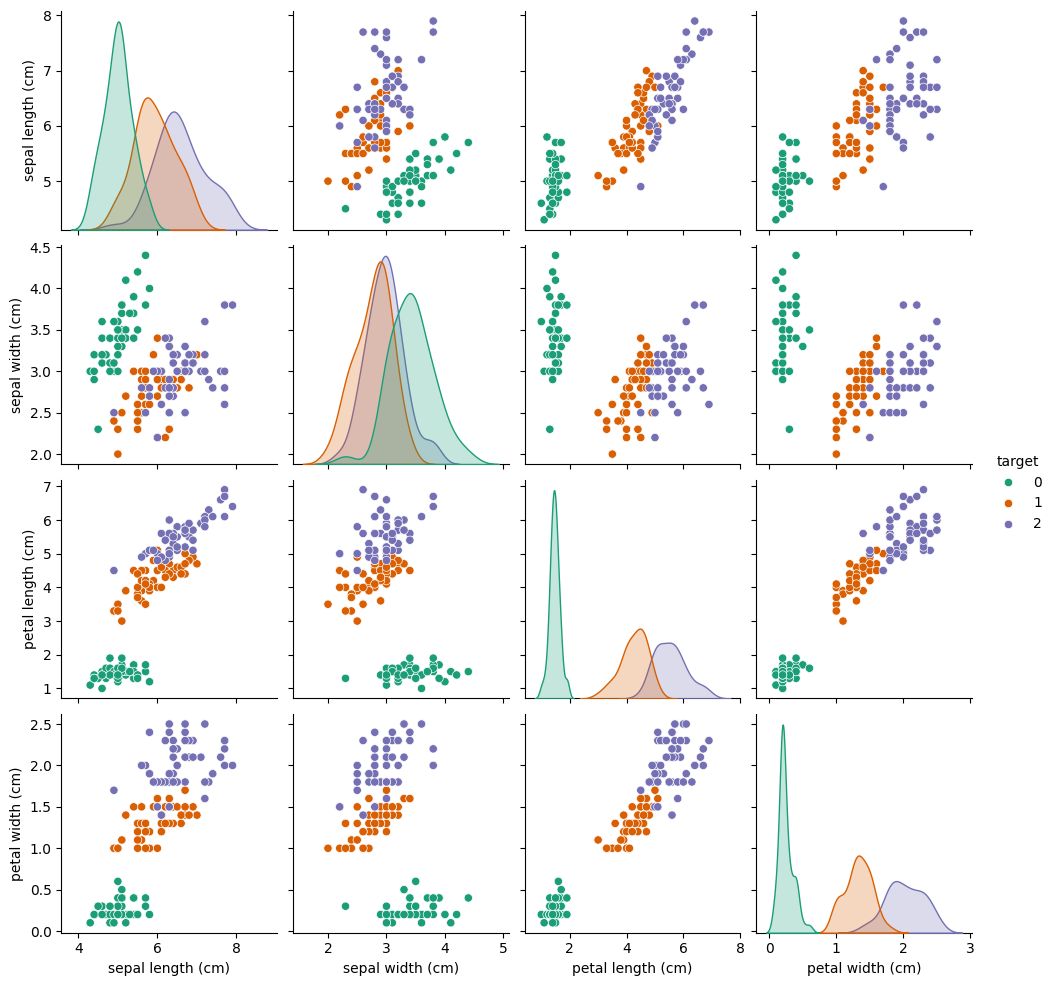

In [49]:
sns.pairplot(df, hue='target', palette='Dark2')

# Completamente, não, mas existem várias combinações que separam razoavelmente bem

### Exercício - 002

Utilize o método _PCA_ do módulo `sklearn.decomposition` para executar a análise de componentes principais no conjunto de dados da iris.


In [50]:
# Escalonamento
scaler = preprocessing.StandardScaler()
X_escalonado = scaler.fit_transform(X)


In [51]:
pca = decomposition.PCA(n_components=2)

In [52]:
pca.fit(X)

PCA(n_components=2)

In [53]:
X_pca = pca.fit_transform(X_escalonado)

### Exercício - 003
Faça um diagrama de dispersão das dimensões reduzidas colorindo os pontos pelas classes dos dados.

In [63]:
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
df_pca['classe'] = df.species

In [64]:
df_pca.head()

,PC1,PC2,classe
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


<Axes: xlabel='PC1', ylabel='PC2'>

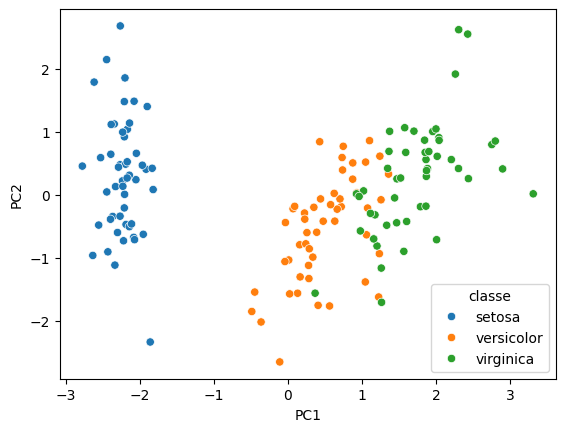

In [80]:
sns.scatterplot(df_pca, x='PC1', y='PC2', hue='classe')

### Exercício - 004
Obtenha a variância explicada por cada componente do modelo.

In [82]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

### Exercício - 005
Execute a centralização dos dados originais da iris (subtrair a média de cada coluna, de cada valor naquela coluna). Multiplique a matriz centralizada pela transposta da matriz `components_` do seu PCA. Compare com a matriz dos seus dados obtida com o método _fit_transform_.

In [96]:
# Importar
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Centralizar
medias = np.mean(X, axis=0)
X_centralizado = X - medias

# Refazer o PCA
pca = decomposition.PCA()
X_pca = pca.fit_transform(X)

# Multiplicar pela transposta de components
X_centralizado_multiplicado_por_transposta_de_components = np.dot(X_centralizado, pca.components_.transpose())

# Comparar
print(X_centralizado_multiplicado_por_transposta_de_components[:5])
print(X_pca[:5])

[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02  2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01  9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02  1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02 -7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02 -6.12585926e-02]]
[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02  2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01  9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02  1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02 -7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02 -6.12585926e-02]]


### Exercício - 006
Utilize o atributo _feature_names_ dos dados da iris para fazer um mapa de calor nomeando os indices da transposta da matriz _components__. Baseado nesse mapa de calor, qual característica da iris contribui mais para separação no primeiro componente principal?

                        PC1       PC2
sepal length (cm)  0.361387  0.656589
sepal width (cm)  -0.084523  0.730161
petal length (cm)  0.856671 -0.173373
petal width (cm)   0.358289 -0.075481


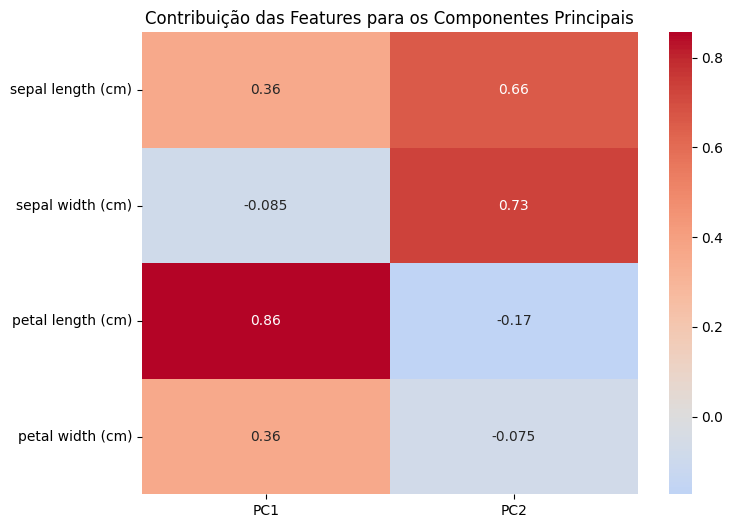

In [98]:
# Carregar
iris = datasets.load_iris()
X = iris.data
classes = iris.feature_names

# Reduzir
pca = decomposition.PCA(n_components=2)
pca.fit(X)

# Criar um DataFrame para facilitar manipulação
components_df = pd.DataFrame(
    data=pca.components_.T,
    index=classes,
    columns=['PC1', 'PC2']
)

# Exibir o DataFrame para inspecionar
print(components_df)

# Criar o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(components_df, annot=True, cmap='coolwarm', center=0)

plt.title('Contribuição das Features para os Componentes Principais')
plt.show()

### Exercício - 007
Utilize o método _KMeans_ do módulo `sklearn.cluster` para encontrar 3 grupos nos dados da iris.

In [104]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)

# Adicionar os rótulos dos clusters ao df
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['Cluster'] = kmeans.labels_

display(df.head())
print(df.Cluster.value_counts())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Cluster
2    61
1    50
0    39
Name: count, dtype: int64


### Exercício - 008
Faça um diagrama de disperção de duas características da iris destacando os centros dos grupos encontrados, armazenados no atributo _cluster_centers_.

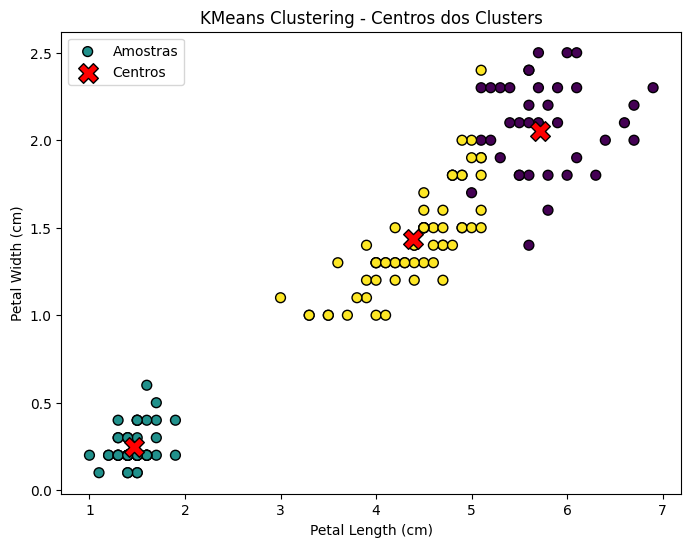

In [107]:
centros = kmeans.cluster_centers_

# Gráfico de dispersão usando Petal Length e Petal Width
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 3], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50, label='Amostras')

# Adicionar os centros dos clusters ao gráfico
plt.scatter(centros[:, 2], centros[:, 3], c='red', marker='X', s=200, edgecolor='black', label='Centros')

# Configurações do gráfico
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('KMeans Clustering - Centros dos Clusters')
plt.legend()
plt.show()